In [1]:
import pickle
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from utils.swSets import *
from utils.preprocessing import *
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
corpus = pickle.load(open("/Vrac/PLDAC_reco/pickles/corpus.p", "rb"))

In [3]:
path = "/Vrac/PLDAC_reco/addic7ed"
d_info, d_name = getDicts(path)

## Count

In [12]:
#vectorizer = CountVectorizer(corpus, stop_words = stopwords_set, max_df=0.4, min_df=20)

In [13]:
#X = vectorizer.fit_transform(corpus)

In [14]:
#pickle.dump(X, open("/Vrac/PLDAC_reco/pickles/mat_count_voc_53540_maxdf_0.4_mindf_20.p", "wb"))

In [4]:
X = pickle.load(open("/Vrac/PLDAC_reco/pickles/mat_count_voc_53540_maxdf_0.4_mindf_20.p", "rb"))

In [15]:
#voc = vectorizer.get_feature_names()

In [16]:
#pickle.dump(voc, open("/Vrac/PLDAC_reco/pickles/voc_count_voc_53540_maxdf_0.4_mindf_20.p", "wb"))

In [5]:
voc = pickle.load(open("/Vrac/PLDAC_reco/pickles/voc_count_voc_53540_maxdf_0.4_mindf_20.p", "rb"))

In [6]:
len(voc)

53540

In [7]:
k = 20
lda = LatentDirichletAllocation(n_components=k,random_state=0)

In [8]:
lda.fit(X)
doc_topic_distrib = lda.transform(X) #p(z|d)
topic_word_distrib = lda.components_/lda.components_.sum(axis=1)[:, np.newaxis] #p(w|z)

/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [9]:
topn = 50
for i in range(k):
    dist = topic_word_distrib[i]
    ind = np.argpartition(dist, -topn)[-topn:]
    ind = list(ind[np.argsort(dist[ind])])
    ind.reverse()
    print("cluster", i)
    res = [voc[i] for i in ind]
    print(res)

cluster 0
['colonel', 'lieutenant', 'commander', 'sergeant', 'max', 'tony', 'smith', 'gibbs', 'archie', 'navy', 'roger', 'homer', 'admiral', 'edith', 'jeannie', 'aye', 'bart', 'macgyver', 'corporal', 'mcgee', 'groans', 'marge', 'lisa', 'radar', 'hogan', 'chattering', 'herr', 'schultz', 'petty', 'nelson', 'gasps', 'rene', 'grunts', 'lt', 'grunting', 'chuckling', 'marine', 'sonny', 'simpson', 'mac', 'doc', 'klink', 'groaning', 'skipper', 'pierce', 'crockett', 'german', 'bud', 'beeping', 'jim']
cluster 1
['sam', 'fred', 'lucy', 'harry', 'annie', 'lt', 'magnum', 'higgins', 'ted', 'niles', 'barney', 'betty', 'thomas', 'robin', 'dorothy', 'frasier', 'crane', 'darrin', 'larry', 'blanche', 'ralph', 'arthur', 'ethel', 'daphne', 'sheriff', 'rick', 'sally', 'alice', 'howard', 'leonard', 'samantha', 'billy', 'sheldon', 'mason', 'terrific', 'marshall', 'fran', 'telephone', 'stanley', 'lf', 'gee', 'jonathan', 'doorbell', 'freddie', 'roz', 'simon', 'sophia', 'scooby', 'maurice', 'penny']
cluster 2
['

In [35]:
i = 7
dist = topic_word_distrib[i]
ind = np.argpartition(dist, -topn)[-topn:]
ind = list(ind[np.argsort(dist[ind])])
ind.reverse()
cl7 = [voc[i] for i in ind]

In [40]:
dico = dict()
for i in range(len(ind)):
    dico[cl7[i]] = dist[ind[i]]

(-0.5, 399.5, 199.5, -0.5)

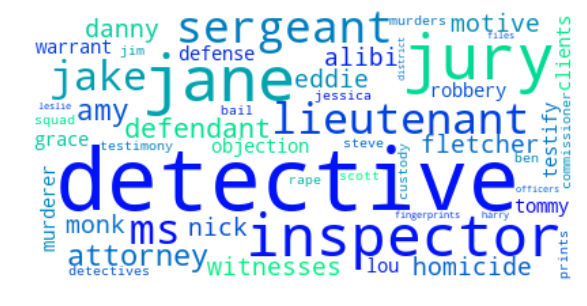

In [42]:
wordcloud = WordCloud(background_color="white", colormap="winter")
wordcloud.generate_from_frequencies(frequencies=dico)
plt.figure( figsize=(15,5) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [10]:
cpt = 0
clusters = dict.fromkeys([i for i in range(k)], [])
for doc in doc_topic_distrib:
    c = np.argmax(doc)
    clusters[c] = clusters[c] + [cpt]
    cpt += 1

In [11]:
for i in range(k):
    with open("20_clusters_voc_53540_mindf_20_max_df_0.4/cluster_"+str(i), "w") as f:
            f.write("Cluster numéro "+str(i)+" :\n\n")
            for ind in clusters[i]:
                f.write(str(d_name[ind])+"\n")

In [12]:
c = []
nlargest = 10
cpt = 0
for ind in clusters[7]:
    print(ind)
    if cpt %2== 0 and cpt > 0:
        
        sparsemat, df = getTfidfSparseMatAndDataFrame(c, my_stopwords=stopwords_set, max_df=0.8)
        c = []
        nlargest = 10
        order = np.argsort(-df.values, axis=1)[:, :nlargest]
        result = pd.DataFrame(df.columns[order], 
                              columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                              index=df.index)
        print(result)
    
    
    cpt += 1
    c.append(corpus[ind])

62
63
69
taille vocabulaire :  5609
    top1   top2     top3       top4   top5    top6     top7    top8      top9  \
0   nick   pete  morelli  kaczmarek   mike   nicky     zoey  dwayne      cole   
1  garza  cyrus    tracy      beals  eddie  mereta  lucinda  kelvin  trujillo   

  top10  
0  cody  
1  daws  
73
77
taille vocabulaire :  10611
    top1      top2    top3      top4 top5      top6  top7      top8  \
0  maria    monica  wright  madeline   ms    brogan  glen     peale   
1  nucky  thompson    fuck   fucking  eli  atlantic    al  laughing   

        top9     top10  
0   sellards  santiago  
1  schroeder    chalky  
84
89
taille vocabulaire :  7397
       top1      top2   top3    top4    top5     top6       top7   top8  \
0     honor    client   lily  freddy   trial  chelsea     victim   beth   
1  growllng  creature  julie   mcgee  banner    davld  screamlng  rocky   

        top9    top10  
0  detective  rebecca  
1      gamma   norman  
150
189
taille vocabulaire :  13593


taille vocabulaire :  2964
    top1    top2        top3     top4    top5   top6   top7    top8   top9  \
0  roger  edward   sebastian    vanja  ragnar    leo  johan  torkel  motel   
1   zach   ethan  canterbury  russell     liz  trial  honor  jasper   jury   

   top10  
0  hinde  
1  louis  
1353
1372
taille vocabulaire :  3700
      top1   top2    top3   top4   top5     top6    top7    top8      top9  \
0      bob   iris  hannah  kevin  rajeb  charles     tim      00  lucienne   
1  camille  simon    léna  adèle    dam     toni  audrey  victor     gonna   

   top10  
0  lotte  
1   town  
1417
1439
taille vocabulaire :  4083
     top1    top2    top3      top4     top5      top6  top7      top8 top9  \
0  vivian  bowers  julian    edward      mia    joanna   dad  lyritrol  ben   
1     mma     rra  dumela  ramotswe  michael  botswana  note      pula  tea   

      top10  
0     wanna  
1  matekoni  
1525
1526
taille vocabulaire :  16045
        top1    top2      top3       top4    

taille vocabulaire :  15845
     top1      top2   top3     top4     top5     top6      top7    top8  \
0   kibre      soin  lucas  lascher  voychek   peluso    duvall   colby   
1  alicia  florrick   cary      eli  kalinda  gardner  lockhart  bishop   

        top9  top10  
0  hernandez  petro  
1      david   agos  
2952
2972
taille vocabulaire :  9231
       top1     top2    top3       top4    top5    top6   top7    top8  \
0       ron     beth  luther      karen  mortin   stein  trott  regina   
1  annabeth  maureen  murphy  schraeder  veeder  brooks  billy    eric   

      top9   top10  
0     jake  claire  
1  hellman  conlon  
2976
2982
taille vocabulaire :  11789
          top1     top2     top3    top4          top5      top6     top7  \
0        sarge     mate     matt  duncan         simon  jennifer   bloody   
1  diefenbaker  vecchio  mountie    dief  neighborhood     benny  chicago   

       top8    top9    top10  
0   stanley    nick    allie  
1  canadian  willie  cari

In [13]:
%%capture
c = []
cpt = 0
dico_list = []
nb_series = len(clusters[7])
nlargest = 10

for i in range(0, nb_series):
    #if i != 2:
        #break
    c = []
    c.append(corpus[clusters[7][i]])
    dico = dict()
    #print(i)
    for j in range(0, nb_series):
        #print(i, j)
        if i != j :
            c.append(corpus[clusters[7][j]])
            
            sparsemat, df = getTfidfSparseMatAndDataFrame(c, my_stopwords=stopwords_set, max_df = 0.9)
            order = np.argsort(-df.values, axis=1)[:, :nlargest]
            
            
            result = pd.DataFrame(df.columns[order], 
                              columns=['top{}'.format(k) for k in range(1, nlargest+1)],
                              index=df.index)
            
            top_tfidf = list(result.values.tolist()[0])
            #print(top_tfidf)mat_count_voc_53540_maxdf_0
            for word in top_tfidf:
                if word not in dico.keys():
                    dico[word] = 1
                else:
                    dico[word] += 1
            c.pop()
    dico_list.append(dico)

In [23]:
seuil = 100 #revient à un seuil de 80% des séries car 123 séries dans le cluster
words_list = []
for i in range(len(dico_list)):
    l = []
    sorted_x = sorted(dico_list[i].items(), key=lambda kv: kv[1])
    for t in sorted_x:
        if t[1] > seuil:
            l.append(t)
    words_list.append(l)

In [24]:
words_list

[[('morelli', 120), ('kaczmarek', 122)],
 [('tracy', 103), ('cyrus', 110), ('garza', 121)],
 [('wright', 101), ('rothstein', 112)],
 [('eli', 103), ('nucky', 122)],
 [],
 [('mcgee', 114), ('screamlng', 114), ('growllng', 122), ('davld', 122)],
 [('della', 103)],
 [('caleb', 113), ('ty', 114)],
 [('morse', 113), ('lnspector', 119)],
 [('sipowicz', 120)],
 [('lauren', 106)],
 [('desmond', 104), ('steele', 115)],
 [('favelloni', 102),
  ('zen', 109),
  ('heuber', 118),
  ('aurelio', 121),
  ('faso', 121),
  ('ruspanti', 122),
  ('miletti', 122)],
 [('baron', 103), ('abel', 107), ('osborne', 116), ('rosnovski', 122)],
 [('rex', 107), ('böck', 114), ('moser', 118), ('brandtner', 119)],
 [('clive', 112), ('costello', 112)],
 [('sara', 101),
  ('krister', 103),
  ('göran', 104),
  ('lina', 115),
  ('jonny', 116),
  ('henrik', 117),
  ('sandhamn', 122)],
 [('brogan', 119), ('haldane', 121), ('slomo', 122)],
 [('lárus', 116),
  ('larus', 117),
  ('inga', 121),
  ('helgi', 122),
  ('veigar', 122

In [17]:
#pickle.dump(dico_list, open("/Vrac/PLDAC_reco/pickles/cluster_7_tf.p", "wb"))

In [2]:
dico_list = pickle.load(open("/Vrac/PLDAC_reco/pickles/cluster_7_tf.p", "rb"))

In [3]:
seuil = 100 #revient à un seuil de 80% des séries car 123 séries dans le cluster
words_list = []
for i in range(len(dico_list)):
    l = []
    sorted_x = sorted(dico_list[i].items(), key=lambda kv: kv[1])
    for t in sorted_x:
        if t[1] > seuil:
            l.append(t[0])
    words_list.append(l)
words_list

[['morelli', 'kaczmarek'],
 ['tracy', 'cyrus', 'garza'],
 ['wright', 'rothstein'],
 ['eli', 'nucky'],
 [],
 ['mcgee', 'screamlng', 'davld', 'growllng'],
 ['della'],
 ['caleb', 'ty'],
 ['morse', 'lnspector'],
 ['sipowicz'],
 ['lauren'],
 ['desmond', 'steele'],
 ['favelloni', 'zen', 'heuber', 'faso', 'aurelio', 'miletti', 'ruspanti'],
 ['baron', 'abel', 'osborne', 'rosnovski'],
 ['rex', 'böck', 'moser', 'brandtner'],
 ['clive', 'costello'],
 ['sara', 'krister', 'göran', 'lina', 'jonny', 'henrik', 'sandhamn'],
 ['brogan', 'haldane', 'slomo'],
 ['lárus', 'larus', 'inga', 'snorri', 'helgi', 'veigar'],
 ['olsen',
  'ole',
  'lisbeth',
  'madsen',
  'gordan',
  'hjalmar',
  'bjarne',
  'zemich',
  'volmer'],
 ['augello', 'mimi', 'vigata', 'salvo', 'catarella', 'fazio', 'montalbano'],
 ['carmen', 'stanton', 'jared', 'pindar', 'karp', 'infeld'],
 ['columbo'],
 ['flannigan', 'brimmer', 'ellery', 'velie'],
 ['falcone',
  'schirn',
  'palermo',
  'toto',
  'corleone',
  'biagio',
  'liggio',
  'ri

In [4]:
for l in words_list:
    for m in l:
        print(m)

morelli
kaczmarek
tracy
cyrus
garza
wright
rothstein
eli
nucky
mcgee
screamlng
davld
growllng
della
caleb
ty
morse
lnspector
sipowicz
lauren
desmond
steele
favelloni
zen
heuber
faso
aurelio
miletti
ruspanti
baron
abel
osborne
rosnovski
rex
böck
moser
brandtner
clive
costello
sara
krister
göran
lina
jonny
henrik
sandhamn
brogan
haldane
slomo
lárus
larus
inga
snorri
helgi
veigar
olsen
ole
lisbeth
madsen
gordan
hjalmar
bjarne
zemich
volmer
augello
mimi
vigata
salvo
catarella
fazio
montalbano
carmen
stanton
jared
pindar
karp
infeld
columbo
flannigan
brimmer
ellery
velie
falcone
schirn
palermo
toto
corleone
biagio
liggio
riina
burton
lulu
alvin
fallin
playboy
dalton
maureen
bruno
lynne
rembrandt
keno
leigh
rockford
vincenzo
kolchak
farr
deets
merritt
kruger
camille
dwayne
fidel
theo
kojak
barney
ga
tintin
roban
ronaldo
morse
abby
mcdeere
calvin
amelia
avram
bohm
aster
emory
gail
caleb
merlyn
fisher
phryne
edwards
dirk
jericho
macduff
terri
drebin
lizzie
franny
egan
yates
matty
errol
bleep
d